In [2]:
!pip install visualkeras
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import visualkeras
from PIL import ImageFont


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### **Do not forget to connect to GPU runtime before training**

In [3]:
#importing the dataset
(X_train,Y_train),(X_test,Y_test) = tf.keras.datasets.cifar10.load_data()
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X_train,Y_train,test_size=0.3)

170498071/170498071 [==============================] - 2s 0us/step


In [4]:
X_train.shape

(35000, 32, 32, 3)

In [5]:
# Normalizing the values between -1 and 1

X_train  = X_train/255
X_test = X_test/255

In [6]:
# Create an ImageDataGenerator object with given augmentation settings(just an instance)

datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=20,      # Random rotation within the range of [-20, 20] degrees
    width_shift_range=0.1,  # Random horizontal shift within the range of [-0.1, 0.1] of the total width
    height_shift_range=0.1, # Random vertical shift within the range of [-0.1, 0.1] of the total height
    shear_range=0.2,        # Random shearing transformations within the range of [-0.2, 0.2]
    zoom_range=0.2,         # Random zoom within the range of [0.8, 1.2]
    horizontal_flip=True,   # Randomly flip inputs horizontally
    fill_mode='nearest' ,    # Fill any newly created pixels with the nearest available pixel value
    validation_split=0.2  # Split 20% of the data for validation
)

# Apply data augmentation to the training data
augmented_images = datagen.flow(X_train, Y_train)

# creating the validation data
validation_data = datagen.flow(X_train, Y_train, subset='validation')

## **`This is an Open assignment with minimum instructions`**
You are allowed to search all over the web--> find any articles or implement them--> try your experiments

> **---> create the model**\
**---> tune the hyperparameters like learning_rate, filter/kernel size**\
**---> optimize the result**


In [ ]:
"""
You have got some experience form last assignment '
Use that experience this time
"""

"\nYou have got some experience form last assignment '\nUse that experience this time\n"

In [ ]:
#@title **IMPORTANT ANNOUNCEMENT**
"""
Now with this much freedom, you can do anything
So make sure you understand what you do and after the end of this assignment
 you will have explain all the code you tried in a viva exam
 this will be the mid term evaluation.
"""

'\nNow with this much freedom, you can do anything\nSo make sure you understand what you do and after the end of this assignment\n you will have explain all the code you tried in a viva exam\n this will be the mid term evaluation.\n'

## **YOUR EFFORTS WILL COUNT MORE THE RESULTS YOU GET**
> **So make sure all the time you spent on this notebook should be visible from the notebook**

In [ ]:
"""
Question: What is Batch Normalization? Why is it used for? How does it fix the
problem it is used for? [ Answer in atleast 300 words]
<cite your sources>
Answer:

Batch normalization, is a process to make neural networks faster and more stable through adding extra layers in a deep neural network. The new layer
performs the standardizing and normalizing operations on the input of a layer coming from a previous layer.
A typical neural network is trained using a collected set of input data called batch. Similarly, the normalizing process in batch normalization takes
place in batches, not as a single input. Batch normalization works by performing normalization operations on mini-batches of input data within each layer.

Batch Normalization is a two-step process. First, the input is normalized, and later rescaling and offsetting is performed. The first process i.e.
Normalization is the process of transforming the data to have a mean zero and standard deviation one. In this step we have our batch input from layer
h, So first, we need to calculate the mean of this hidden activation. The next step is to calculate the standard deviation of the hidden activations.
Now, we will normalize the hidden activations using these values. For this, we will subtract the mean from each input and divide the whole value with
the sum of standard deviation and the smoothing term (ε).
The smoothing term(ε) assures numerical stability within the operation by stopping a division by a zero value.
In the final operation, the  re-scaling and offsetting of the input take place. Here two components of the BN algorithm come into the picture,
γ(gamma) and β (beta). These parameters are used for re-scaling (γ) and shifting(β) of the vector containing values from the previous operations.
These two are learnable parameters, during the training neural network ensures the optimal values of γ and β are used. That will enable the accurate
normalization of each batch.

Batch normalization offers many advantages:
By Normalizing the hidden layer activation the Batch normalization speeds up the training process.

It solves the problem of internal covariate shift. Through this, we ensure that the input for every layer is distributed around the same mean and
standard deviation.

Batch normalization acts as a form of regularization, reducing the need for other techniques such as dropout. It introduces slight noise during
training, which can help prevent overfitting and improve generalization.



"""

'\nQuestion: What is Batch Normalization? Why is it used for? How does it fix the \nproblem it is used for? [ Answer in atleast 300 words]\n<cite your sources>\nAnswer: \n\nBatch normalization, is a process to make neural networks faster and more stable through adding extra layers in a deep neural network. The new layer\nperforms the standardizing and normalizing operations on the input of a layer coming from a previous layer.\nA typical neural network is trained using a collected set of input data called batch. Similarly, the normalizing process in batch normalization takes \nplace in batches, not as a single input. Batch normalization works by performing normalization operations on mini-batches of input data within each layer.\n\nBatch Normalization is a two-step process. First, the input is normalized, and later rescaling and offsetting is performed. The first process i.e.\nNormalization is the process of transforming the data to have a mean zero and standard deviation one. In this 

In [ ]:
"""
Tutorial: https://www.tensorflow.org/tutorials/images/classification

Above tutorial does exactly the same job
But I will zero marks for exact same model used in the tutorial

You need experiment with different layers and all those
experiments should be visible by your notebooks
"""

'\nTutorial: https://www.tensorflow.org/tutorials/images/classification\n\nAbove tutorial does exactly the same job\nBut I will zero marks for exact same model used in the tutorial\n\nYou need experiment with different layers and all those\nexperiments should be visible by your notebooks\n'

In [7]:
# model initialization
model = tf.keras.Sequential()

# Intermediate layers
model.add(tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (32,32,3)))
model.add(tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'))

model.add(tf.keras.layers.MaxPooling2D((3,3)))

model.add(tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'))
model.add(tf.keras.layers.Conv2D(128, (3,3), activation = 'relu'))

model.add(tf.keras.layers.MaxPooling2D((3,3)))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(256,activation =  'relu'))


# final layer
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 9, 9, 64)         0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 64)          36928     
                                                                 
 conv2d_3 (Conv2D)           (None, 5, 5, 128)         73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 1, 1, 128)        0         
 2D)                                                    

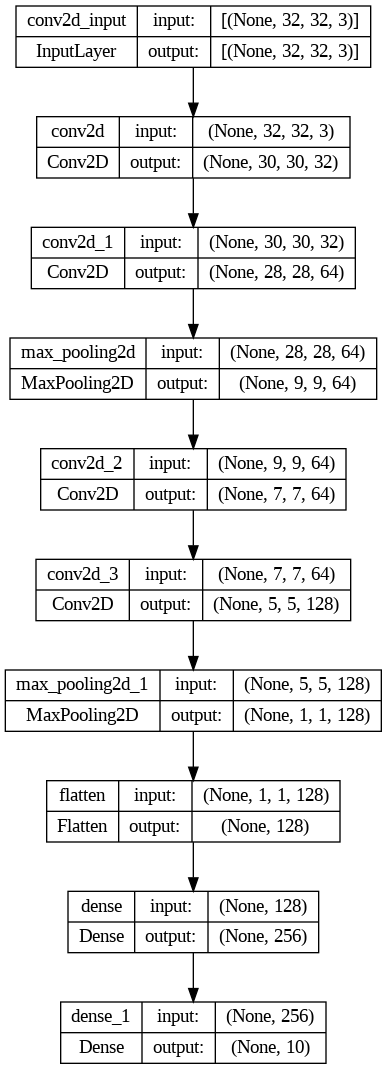

In [9]:
#@title Visualization

# just run this cell as it is
tf.keras.utils.plot_model(model, to_file='cnn_plot.png', show_shapes=True, show_layer_names=True)

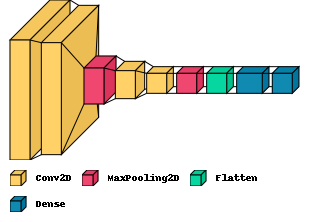

In [10]:
# just run this cell as it is
visualkeras.layered_view(model, legend=True)

In [11]:
"""
In the last part of the assignment
try experimenting with learning rate.
May be decreasing the lr might had help?
"""

model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
                  loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])

In [ ]:
# This is another way of dealing with the generated data
# both X_train and Y_train are inside the augmented image

history = model.fit(augmented_images, epochs=10,validation_data = validation_data)

Epoch 1/10
 863/1094 [======================>.......] - ETA: 35s - loss: 1.0352 - accuracy: 0.0999

In [ ]:
plt.plot(history.history['accuracy'],label="Train accuracy")
plt.plot(history.history['val_accuracy'], label = "Validation accuracy")
plt.legend()

In [ ]:
model.evaluate(X_test,Y_test)

## **TRY DIFFERENT MODELS AND COMPARE THE RESULTS**

In [ ]:
model2  =  tf.keras.Sequential() #changed the kernel

model2.add(tf.keras.layers.Conv2D(8, (5,5), activation = 'relu', input_shape = (32,32,3)))
model2.add(tf.keras.layers.Conv2D(16, (5,5), activation = 'relu'))

model2.add(tf.keras.layers.MaxPooling2D((2,2)))

model2.add(tf.keras.layers.Conv2D(16, (5,5), activation = 'relu'))
model2.add(tf.keras.layers.Conv2D(32, (5,5), activation = 'relu'))

model2.add(tf.keras.layers.MaxPooling2D(2,2))

model2.add(tf.keras.layers.Flatten())

model2.add(tf.keras.layers.Dense(128,activation =  'relu'))


# final layer
model2.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

In [ ]:
model2.summary()

Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_87 (Conv2D)          (None, 28, 28, 8)         608       
                                                                 
 conv2d_88 (Conv2D)          (None, 24, 24, 16)        3216      
                                                                 
 max_pooling2d_30 (MaxPoolin  (None, 12, 12, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_89 (Conv2D)          (None, 8, 8, 16)          6416      
                                                                 
 conv2d_90 (Conv2D)          (None, 4, 4, 32)          12832     
                                                                 
 max_pooling2d_31 (MaxPoolin  (None, 2, 2, 32)         0         
 g2D)                                                

In [ ]:
model2.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
                  loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])

In [ ]:
history = model2.fit(augmented_images, epochs=10,validation_data = validation_data)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


 244/1094 [=====>........................] - ETA: 16s - loss: 2.0633 - accuracy: 0.1303

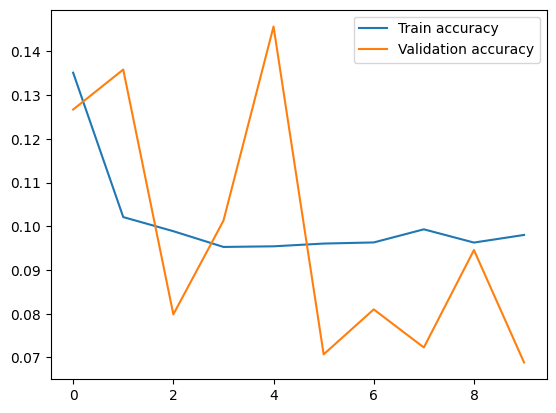

In [ ]:
plt.plot(history.history['accuracy'],label="Train accuracy")
plt.plot(history.history['val_accuracy'], label = "Validation accuracy")
plt.legend()

In [ ]:
model2.evaluate(X_test,Y_test)

In [ ]:
model3  =  tf.keras.Sequential() #changed the learning rate

model3.add(tf.keras.layers.Conv2D(16, (3,3), activation = 'relu', input_shape = (32,32,3)))
model3.add(tf.keras.layers.Conv2D(32, (3,3), activation = 'relu'))

model3.add(tf.keras.layers.MaxPooling2D((3,3)))

model3.add(tf.keras.layers.Conv2D(32, (3,3), activation = 'relu'))
model3.add(tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'))

model3.add(tf.keras.layers.MaxPooling2D(3,3))

model3.add(tf.keras.layers.Flatten())

model3.add(tf.keras.layers.Dense(256,activation =  'relu'))


# final layer
model3.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

In [ ]:
model3.summary()

In [ ]:
model3.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001),
                  loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])

In [ ]:
history = model3.fit(augmented_images, epochs=10,validation_data = validation_data)

In [ ]:
plt.plot(history.history['accuracy'],label="Train accuracy")
plt.plot(history.history['val_accuracy'], label = "Validation accuracy")
plt.legend()

In [ ]:
model3.evaluate(X_test,Y_test)